In [34]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
import seaborn as sns

In [16]:
# Read the CSV file
df_houses = pd.read_csv("dataset/CanadaHouses.csv", encoding = "ISO-8859-1")

In [17]:
#check empty values
df_houses.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

In [18]:
df_houses.describe()

,Price,Number_Beds,Number_Baths,Population,Latitude,Longitude,Median_Family_Income
count,3.576800e+04,35768.000000,35768.000000,3.576800e+04,35768.000000,35768.000000,35768.000000
mean,9.432963e+05,3.283661,2.532403,6.360151e+05,47.446556,-98.421636,89643.103416
std,1.020110e+06,1.730654,1.371910,1.120016e+06,3.333855,22.280935,12132.353510
min,2.150000e+04,0.000000,0.000000,6.338200e+04,42.283300,-123.936400,62400.000000
25%,4.599000e+05,2.000000,2.000000,1.091670e+05,43.866700,-122.316700,82000.000000
50%,6.990000e+05,3.000000,2.000000,2.424600e+05,49.025000,-104.606700,89000.000000
75%,1.095000e+06,4.000000,3.000000,5.228880e+05,49.888100,-79.866700,97000.000000
max,3.700000e+07,109.000000,59.000000,5.647656e+06,53.916900,63.100500,133000.000000


In [19]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [20]:
df_houses.columns

Index(['City', 'Price', 'Address', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income'],
      dtype='object')

In [21]:
df_houses = df_houses[['City', 'Price', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income']]

In [23]:
from sklearn.preprocessing import LabelEncoder
df_column = df_houses['City']
label_encoder = LabelEncoder()
df_houses['City'] = label_encoder.fit_transform(df_column)
df_houses['City'].head(3)

df_column = df_houses['Province']
label_encoder = LabelEncoder()
df_houses['Province'] = label_encoder.fit_transform(df_column)

In [25]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  int64  
 1   Price                 35768 non-null  float64
 2   Number_Beds           35768 non-null  int64  
 3   Number_Baths          35768 non-null  int64  
 4   Province              35768 non-null  int64  
 5   Population            35768 non-null  int64  
 6   Latitude              35768 non-null  float64
 7   Longitude             35768 non-null  float64
 8   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 2.5 MB


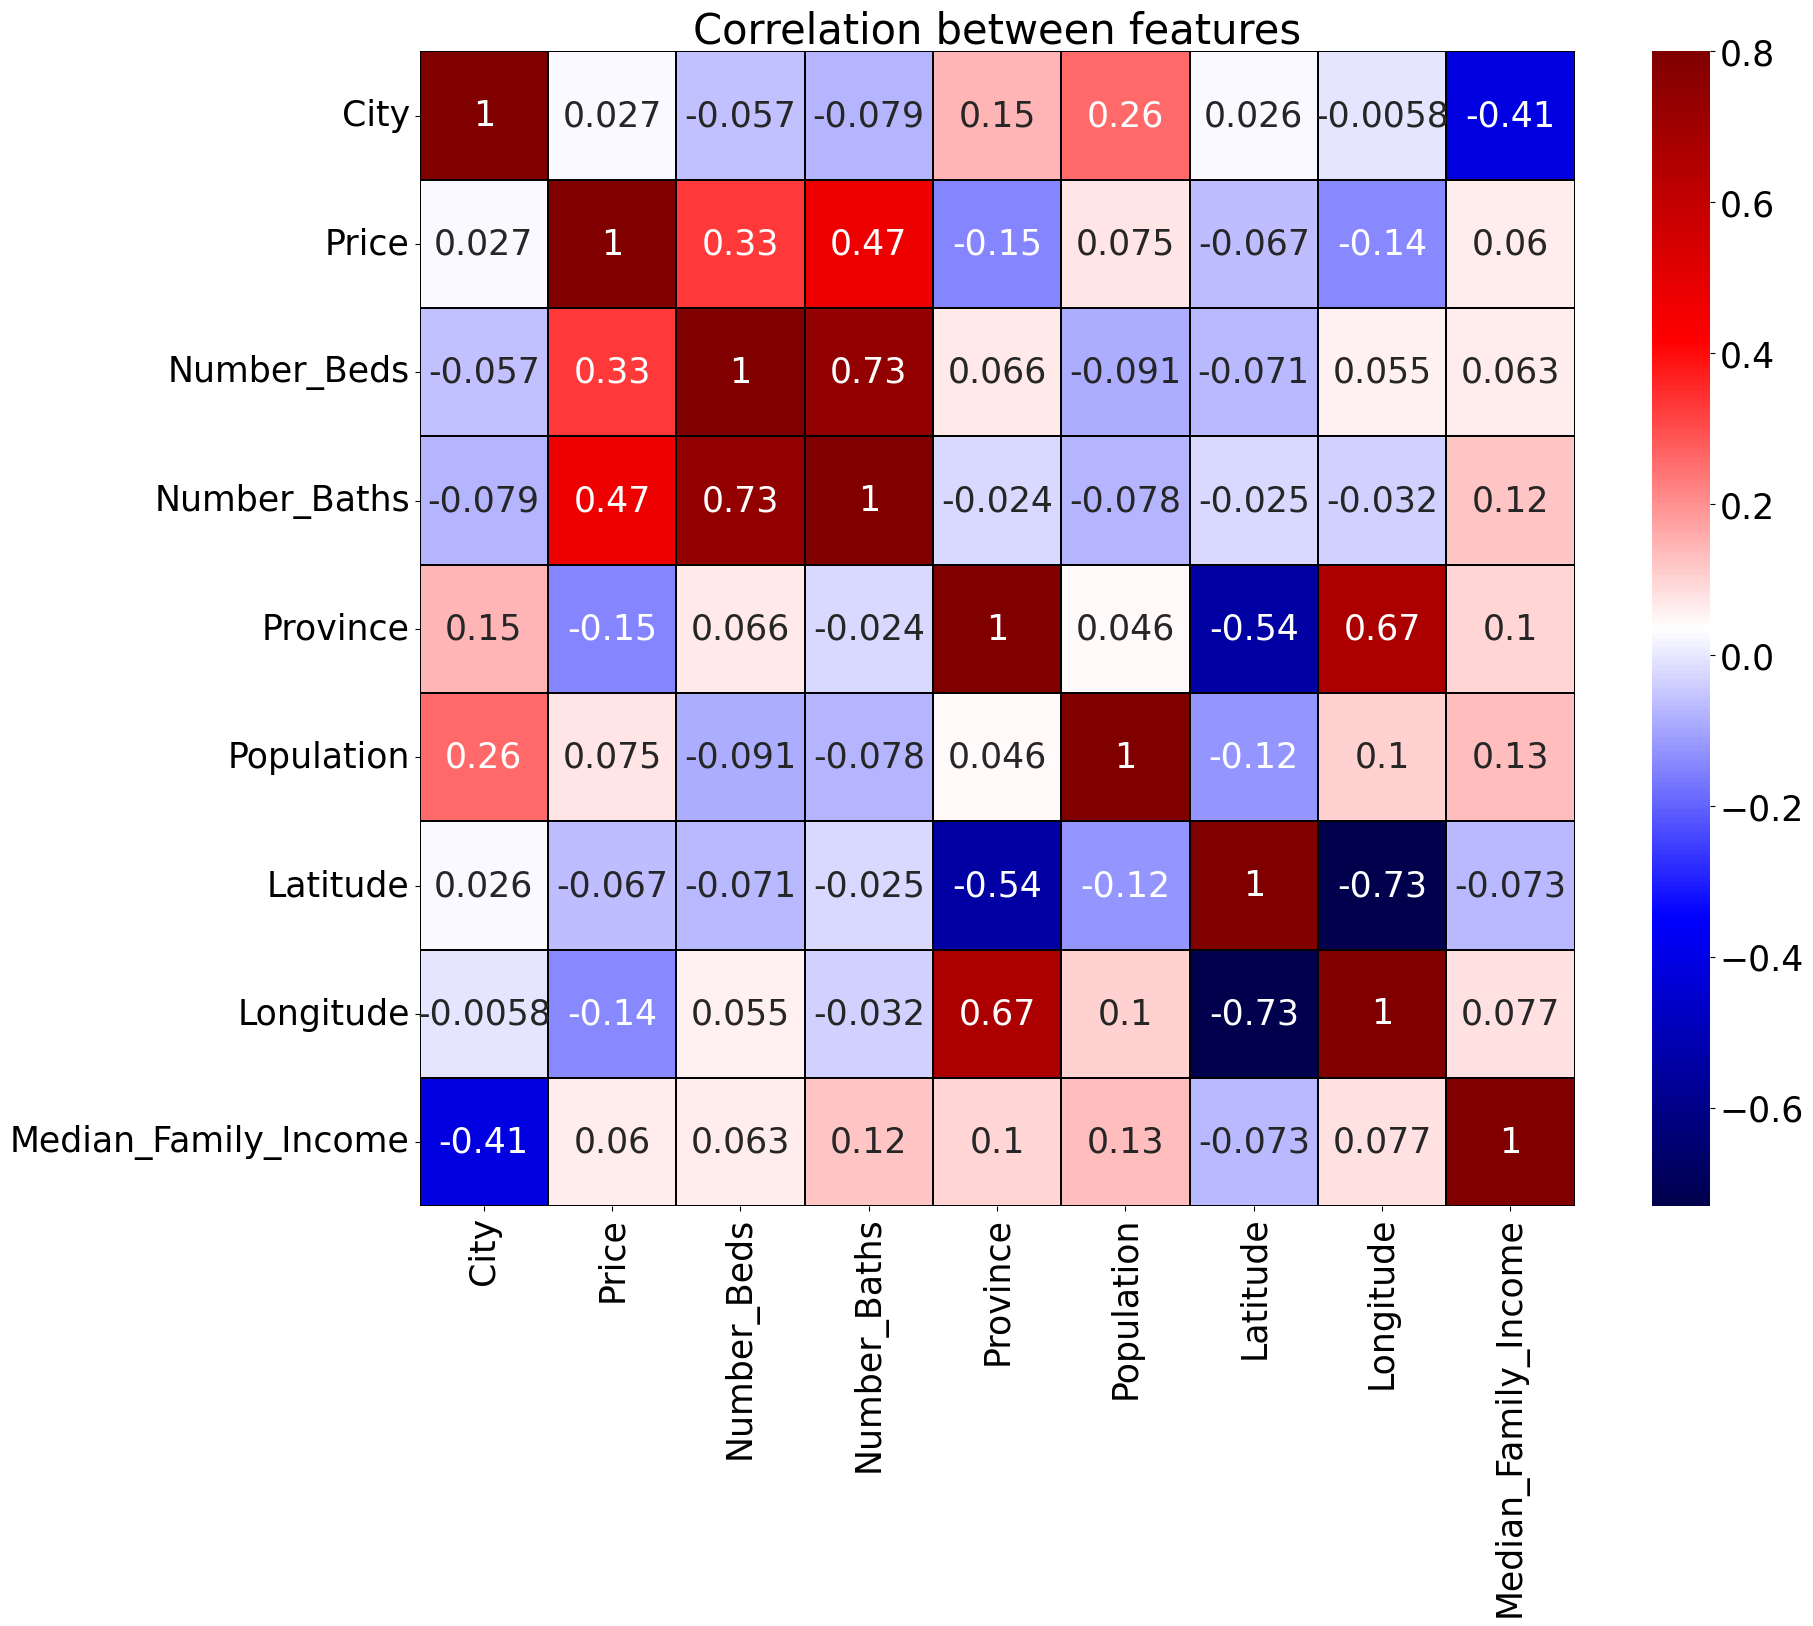

In [29]:
corr=df_houses.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='seismic',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [30]:
df_houses.corr()

,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
City,1.000000,0.026844,-0.057167,-0.078686,0.147206,0.256588,0.025644,-0.005797,-0.410616
Price,0.026844,1.000000,0.329956,0.466821,-0.148762,0.074892,-0.066704,-0.138830,0.059795
Number_Beds,-0.057167,0.329956,1.000000,0.734809,0.065572,-0.090701,-0.070578,0.054964,0.062508
Number_Baths,-0.078686,0.466821,0.734809,1.000000,-0.023767,-0.078458,-0.025043,-0.031822,0.122173
Province,0.147206,-0.148762,0.065572,-0.023767,1.000000,0.046130,-0.540368,0.666435,0.099580
Population,0.256588,0.074892,-0.090701,-0.078458,0.046130,1.000000,-0.121343,0.101822,0.134979
Latitude,0.025644,-0.066704,-0.070578,-0.025043,-0.540368,-0.121343,1.000000,-0.730736,-0.072871
Longitude,-0.005797,-0.138830,0.054964,-0.031822,0.666435,0.101822,-0.730736,1.000000,0.076988
Median_Family_Income,-0.410616,0.059795,0.062508,0.122173,0.099580,0.134979,-0.072871,0.076988,1.000000


In [ ]:
df_houses.info()